# Practice 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.utils import shuffle
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fake = pd.read_csv('/content/drive/MyDrive/Datasets/Fake.csv', delimiter = ',') 
true = pd.read_csv('/content/drive/MyDrive/Datasets/True.csv', delimiter = ',')

In [4]:
fake.head() 

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake['target'] = 0 
true['target'] = 1 

df = pd.DataFrame() 
df = true.append(fake)

In [7]:
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
print(df.shape)

(44898, 5)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [10]:
# Shuffle the data 
df = shuffle(df).reset_index(drop=True) 
df.head()

,title,text,subject,date,target
0,LIBS ON SOCIAL MEDIA Make Disgusting Compariso...,Liberals on Twitter accused President Donald T...,left-news,"Jun 26, 2017",0
1,#BlackLivesMatter Leader To Run For Mayor Of ...,The police shooting of black teen Michael Brow...,News,"February 4, 2016",0
2,Mood sours in ethnically split Cyprus over aid...,ATHENS (Reuters) - Cyprus said on Wednesday it...,worldnews,"October 4, 2017",1
3,Inquiry ordered into deadly Indian power plant...,NEW DELHI (Reuters) - Indian authorities on Th...,worldnews,"November 2, 2017",1
4,Virginia becomes first U.S. state to regulate ...,(Reuters) - Virginia Governor Terry McAuliffe ...,politicsNews,"March 8, 2016",1


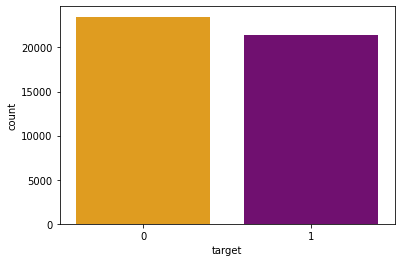

In [11]:
sns.countplot(x='target',data=df,palette=['orange','purple'])

In [12]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [13]:
df.dtypes

title      object
text       object
subject    object
date       object
target      int64
dtype: object

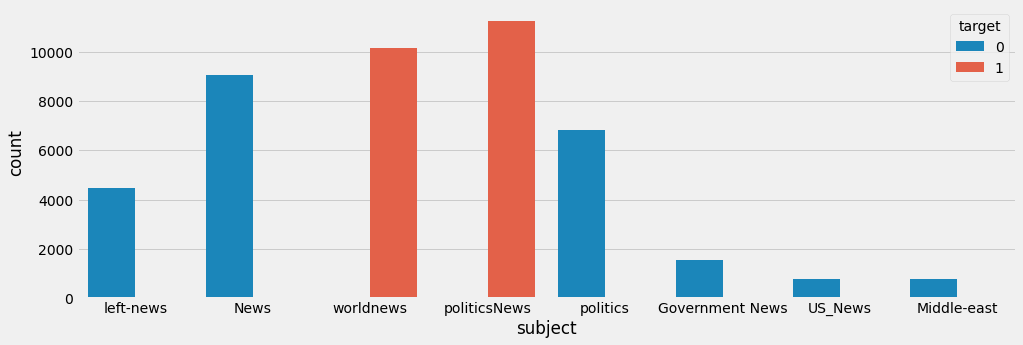

In [14]:
plt.style.use('fivethirtyeight') 
plt.figure(figsize=(15,5)) 
sns.countplot(x='subject',data=df,hue='target')

Task 1: describe the type of style 'fivethirtyeight' used by pyplot library. 
Task 2: comment on the distribution results.

Answer 1. The graph has a gray background without title. Graph fields are missing. Axis labels, legend and data color difference are available. Each type of news is signed. There is no comparison in each type of news of the amount of truth and lies.

Answer 2. Most of all, you can watch the news of politics and the world, which are true. Next in number, news and politics are false, like the rest of the data on the chart.

In [15]:
df['text']=df['text']+" "+df['title']

In [16]:
df.drop(['title','subject','date'],axis=1,inplace=True) 
df.head()

,text,target
0,Liberals on Twitter accused President Donald T...,0
1,The police shooting of black teen Michael Brow...,0
2,ATHENS (Reuters) - Cyprus said on Wednesday it...,1
3,NEW DELHI (Reuters) - Indian authorities on Th...,1
4,(Reuters) - Virginia Governor Terry McAuliffe ...,1


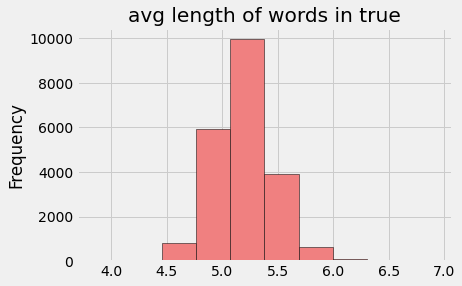

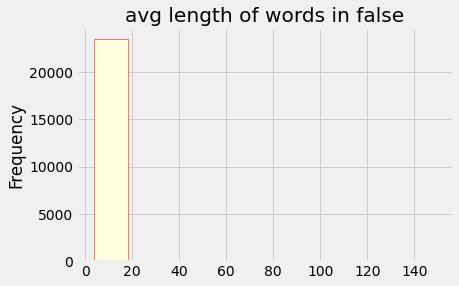

In [17]:
avg_len_word=df[df['target']==1].text.str.split().map(lambda x:np.mean([len(word) for word in x])) 
avg_len_word.plot(kind='hist',edgecolor='black',color='lightcoral',title='avg length of words in true') 
plt.show() 
avg_len_word=df[df['target']==0].text.str.split().map(lambda x:np.mean([len(word) for word in x])) 
avg_len_word.plot(kind='hist',edgecolor='red',color='lightyellow',title='avg length of words in false') 
plt.show()

Task 3: comment the results, shown in plots.

Answer 3. The graph shows that the number of words in false news is greater than in real news, sometimes more than 2 times. Such news is published more than 2 times.

In [18]:
from collections import Counter 
# add a column ‘temp_list’ with separate words to dataframe 
df['temp_list']=df['text'].apply(lambda x: str(x).split()) 
# count the frequency of words occurrence 
top=Counter([word for li in df['temp_list'] for word in li]) 
# form the top 20 most frequently occurring words
temp_1=pd.DataFrame(top.most_common(20))
# set names to columns in temp_1 dataframe and display it in color 
temp_1.columns=["most_common_words","frequency"] 
temp_1.style.background_gradient(cmap='Blues')

,most_common_words,frequency
0,the,907070
1,to,538754
2,of,441512
3,and,393995
4,a,391144
5,in,327394
6,that,221170
7,on,185433
8,s,172260
9,for,169435


In [19]:
import plotly.express as pe 
import plotly.figure_factory as ff 
fig = pe.bar(temp_1, x="frequency", y="most_common_words", title='Commmon Words in Text', orientation='h', width=700, height=700, color='most_common_words') 
fig.show()

Task 4: analyze the resulting plots, do you think such feature as ‘most_common_words’ is useful for the further text classification? 

Task 5: guess, how we can modify this feature to get more useful results in text data description.

Answer 4. The received most used words will not help for further analysis, because these are auxiliary verbs, particles, conjunctions, prepositions, etc.

Answer 5. Add a condition for the selection that the word must be more than 2 letters.

# Practice 2

**Data cleaning and preprocessing**

Data cleansing is a very important step in any machine learning model, but more so for NLP. Without a cleanup process, the data set is often a collection of words that the computer does not understand. Typically, the following procedures are used for text preprocessing:

Tokenization – splitting sentences to words.

Normalization – lowercasing, lemmatization or stemming.

Lemmatization put forms of each word into a common base or root taking into account the morphological analysis of words. 

Stemming is the process of reducing inflection in words to their root forms by removing the suffixes or prefixes used with a word.

Noise entities removal – punctuation, stopwords, etc. deletion.

Let’s analyze the main punctuation marks in real and fake news:

In [20]:
from collections import defaultdict 
# define a function to get list of words according to the target class 
def create_words(target): 
  words = [] 
  for x in df[df['target']==target]['text'].str.split(): 
    for i in x: 
      words.append(i) 
  return words

Define a function counts most occurring punctuation symbols:

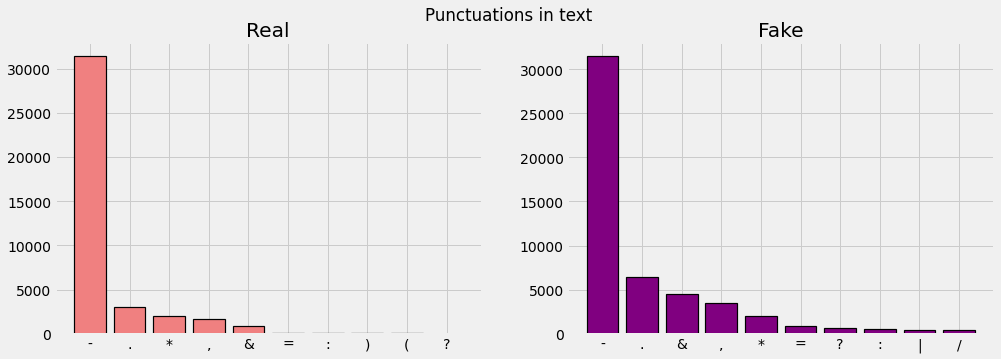

In [21]:
import string 
# create a list with punctuation symbols 
punctuation_list=list(string.punctuation) 
value_list=[] 
# define a function counts most occuring punct. symbols 
# according to the target class 
# with arguments: dataframe, function_form_words_list, list_of_targets 
def most_occuring(dataset,fun,target): 
  d=defaultdict(int) 
  for j in range(0,len(target)): # for every type of target 
    words=fun(target[j]) # call function create_words() 
    for i in words: 
      if i in punctuation_list: # if word is punctuation symbol 
        d[i]+=1 # count it
    # sort to 10 symbols by their count in descending order 
    top=sorted(d.items(),key=lambda x: x[1],reverse=True)[:10] 
    # separate punctuation symbols from their quantification 
    x_items,y_counts=zip(*top) 
    # append symbols and their quantification to value_list 
    value_list.append(x_items) 
    value_list.append(y_counts) 
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5)) 
  
  ax1.bar(value_list[0],value_list[1],color="lightcoral", edgecolor='black', linewidth=1.2) 
  ax1.set_title("Real") 
  
  ax2.bar(value_list[2],value_list[3],color="purple", edgecolor='black', linewidth=1.2) 
  ax2.set_title("Fake") 
  
  plt.suptitle("Punctuations in text") 
  plt.show() 
  
most_occuring(df,create_words,[1,0])

Task 1: What is the difference between the object dict and defaultdict? 

The main difference between defaultdict and dict is that when you try to access or modify a key that's not present in the dictionary, a default value is automatically given to that key .

Task 2: Why do we need to explore punctuation in text?

Punctuation marks convey tone and meaning in text messages. The addition of punctuation narrows the gap between a mere transcript and a more intelligent understanding of language. Punctuation, used in the right place, significantly improves the readability of transcripts and reduces the time it takes to edit them.

Print the list of stop words in English:

In [22]:
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Text preprocessing using universal text cleaning: The re (Regular expression operations) module provides a set of powerful regular expression facilities, which allows you to quickly check whether a given string matches a given pattern (using the match function), or contains such a pattern (using the search function).

In [23]:
import re

def clean_text(text): 
  lemmatizer = WordNetLemmatizer() 
  stopwords_english = stopwords.words('english') 
  text= re.sub('\[[^]]*\]', '', text) 
  # remove stock market tickers like $GE
  text = re.sub(r'\$\w*', '', text) 
  #removal of html tags 
  review =re.sub(r'<.*?>',' ',text) 
  # remove old style retweet text "RT" 
  text = re.sub(r'^RT[\s]+', '', text) 
  # remove hyperlinks 
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text) 
  # remove hashtags 
  # only removing the hash # sign from the word 
  text = re.sub(r'#', '', text) 
  text = re.sub("["
                 u"\U0001F600-\U0001F64F" # removal of emoticons 
                 u"\U0001F300-\U0001F5FF" # symbols & pictographs 
                 u"\U0001F680-\U0001F6FF" # transport & map symbols 
                 u"\U0001F1E0-\U0001F1FF" # flags (iOS) 
                 u"\U00002702-\U000027B0" 
                 u"\U000024C2-\U0001F251" 
                 "]+",' ',text) 
  text = re.sub('[^a-zA-Z]',' ',text)
  
  text = text.lower() 
  text_tokens =word_tokenize(text) 
  
  text_clean = [] 
  for word in text_tokens: 
    if (word not in stopwords_english and # remove stopwords
          word not in string.punctuation): # remove punctuation 
        lem_word =lemmatizer.lemmatize(word) # lemmitiging word 
        text_clean.append(lem_word) 
  text_mod=[i for i in text_clean if len(i)>2] 
  text_clean=' '.join(text_mod) 
  return text_clean

Apply cleaning function to dataset:

In [24]:
df['clean_text']=df['text'].apply(lambda x: clean_text(x))

Look at the top words of the dataset:

In [25]:
df['clean_temp']=df['clean_text'].apply(lambda x: str(x).split()) 
top=Counter([word for li in df['clean_temp'] for word in li]) 
temp_2=pd.DataFrame(top.most_common(50)) 
temp_2.columns=["common_words",'frequency'] 
temp_2.style.background_gradient(cmap='Blues')

,common_words,frequency
0,trump,142609
1,said,131174
2,state,61511
3,president,56889
4,would,54309
5,year,41475
6,people,40894
7,republican,40778
8,one,38265
9,new,32225


Visualize the results:s

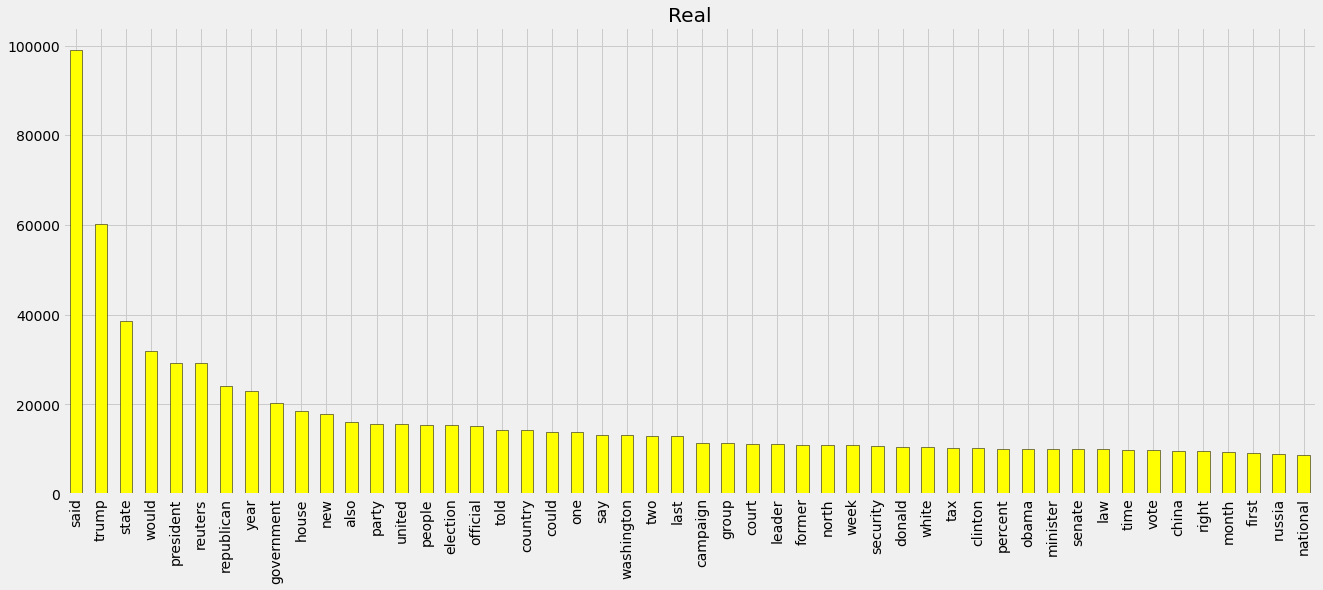

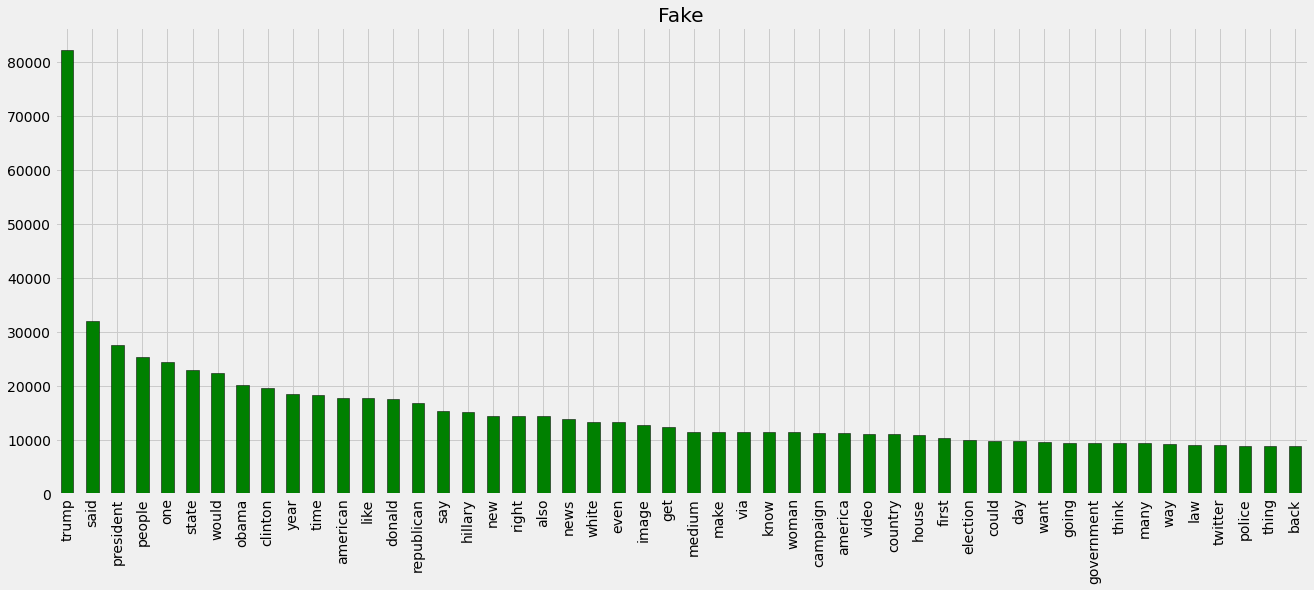

In [26]:
data_1=df[df['target']==1]
pd.Series(' '.join([i for i in data_1.clean_text]).split()).value_counts()[:50].plot(kind='bar', figsize=(20,8), color='yellow', edgecolor='black',title='Real')
plt.show() 

data_0=df[df['target']==0] 
pd.Series(' '.join([i for i in data_0.clean_text]).split()).value_counts()[:50].plot(kind='bar', figsize=(20,8), color='green', edgecolor='black',title='Fake')

Task 3: output top 50 most frequently occurring words after stemming (PorterStemmer) without stopwords punctuation symbols etc. for real and fake news separately. 

Task 4: Plot the results with plotly. Analyze the results. 

Task 5: Describe the difference between stemming and lemmatization. List the advantages and disadvantages of both methods.

Both methods reduce each word to its root. In stemming, this may simply be a reduced form of the target word, while lemmatization is reduced to the true root of the English word, since lemmatization requires cross-references to the target word in the WordNet corpus.

Stemming vs. lemmatization? It's a matter of compromise between speed and details. Stemming is usually faster than lemmatization, but it can be inaccurate.If we want to be more thorough and precise, then lemmatization should be preferred.

In [27]:
df.head()

,text,target,temp_list,clean_text,clean_temp
0,WASHINGTON (Reuters) - Transgender students at...,1,"[WASHINGTON, (Reuters), -, Transgender, studen...",washington reuters transgender student public ...,"[washington, reuters, transgender, student, pu..."
1,OUR GOOD FRIENDS AT TEXAS BORDER VOLUNTEERS ar...,0,"[OUR, GOOD, FRIENDS, AT, TEXAS, BORDER, VOLUNT...",good friend texas border volunteer border catc...,"[good, friend, texas, border, volunteer, borde..."
2,(Reuters) - Jeff Sessions may be known as a pr...,1,"[(Reuters), -, Jeff, Sessions, may, be, known,...",reuters jeff session may known pro business co...,"[reuters, jeff, session, may, known, pro, busi..."
3,President Trump just made liberal heads explod...,0,"[President, Trump, just, made, liberal, heads,...",president trump made liberal head explode libe...,"[president, trump, made, liberal, head, explod..."
4,Before running the most controversial and bomb...,0,"[Before, running, the, most, controversial, an...",running controversial bombastic political camp...,"[running, controversial, bombastic, political,..."




```
#Importing required modules
from nltk.stem.porter import PorterStemmer

#Creating the class object
stemmer = PorterStemmer()

#words to stem
words = ['rain','raining','faith','faithful','are','is','care','caring']

#Stemming the words
for word in words:
    print(word+' -> '+ stemmer.stem(word))
```



In [28]:
from nltk.stem.porter import PorterStemmer #importing required modules

def clean_text_stem(text): 
  stemmer = PorterStemmer() #creating the class object
  
  stopwords_english = stopwords.words('english') 
  text= re.sub('\[[^]]*\]', '', text) 
  # remove stock market tickers like $GE
  text = re.sub(r'\$\w*', '', text) 
  #removal of html tags 
  review =re.sub(r'<.*?>',' ',text) 
  # remove old style retweet text "RT" 
  text = re.sub(r'^RT[\s]+', '', text) 
  # remove hyperlinks 
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text) 
  # remove hashtags 
  # only removing the hash # sign from the word 
  text = re.sub(r'#', '', text) 
  text = re.sub("["
                 u"\U0001F600-\U0001F64F" # removal of emoticons 
                 u"\U0001F300-\U0001F5FF" # symbols & pictographs 
                 u"\U0001F680-\U0001F6FF" # transport & map symbols 
                 u"\U0001F1E0-\U0001F1FF" # flags (iOS) 
                 u"\U00002702-\U000027B0" 
                 u"\U000024C2-\U0001F251" 
                 "]+",' ',text) 
  text = re.sub('[^a-zA-Z]',' ',text)
  
  text = text.lower() 
  text_tokens =word_tokenize(text) 
  
  text_clean_stem = [] 
  for word in text_tokens: 
    if (word not in stopwords_english and # remove stopwords
          word not in string.punctuation): # remove punctuation 
        lem_word =stemmer.stem(word) # stemming the words
        text_clean_stem.append(lem_word) 
  text_mod=[i for i in text_clean_stem if len(i)>2] 
  text_clean_stem=' '.join(text_mod) 
  return text_clean_stem

Apply cleaning function to dataset:

In [29]:
df['text_clean_stem'] = df['text'].apply(lambda x: clean_text_stem(x))

Look at the top words of the dataset:

In [30]:
df['clean_temp_stem']=df['text_clean_stem'].apply(lambda x: str(x).split()) 
top=Counter([word for li in df['clean_temp_stem'] for word in li]) 
temp_3=pd.DataFrame(top.most_common(50)) 
temp_3.columns=["common_words",'frequency'] 
temp_3.style.background_gradient(cmap='Blues')

,common_words,frequency
0,trump,142666
1,said,131174
2,state,63481
3,presid,60366
4,would,54309
5,year,41475
6,peopl,40894
7,republican,40790
8,say,39589
9,one,38265


Visualize the results:s

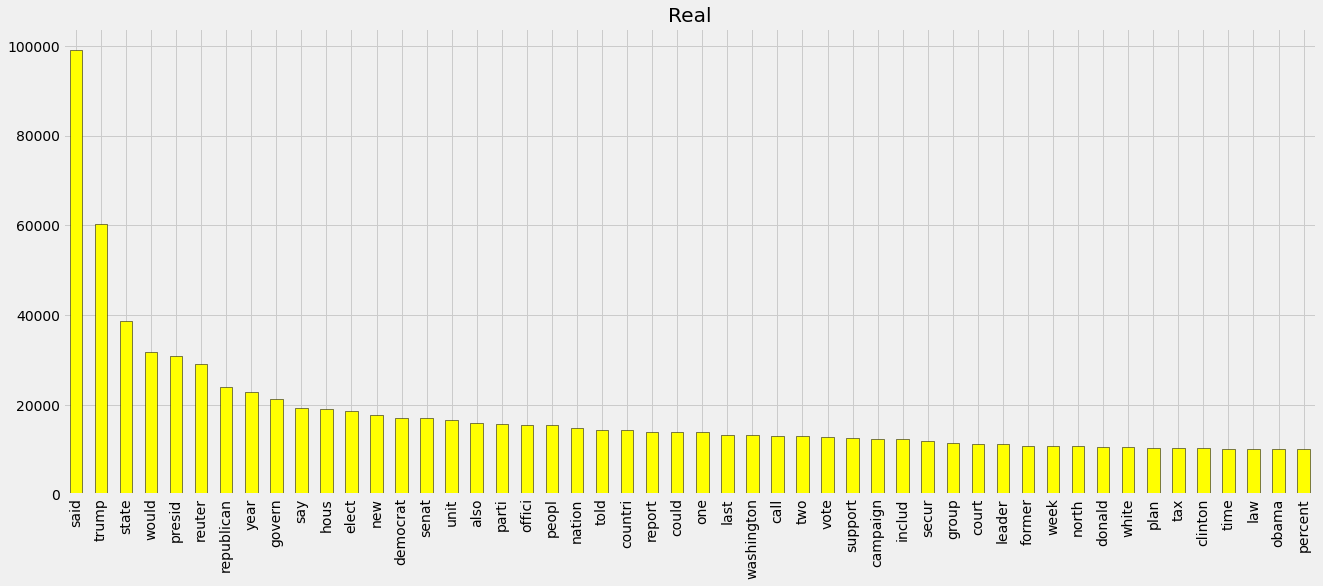

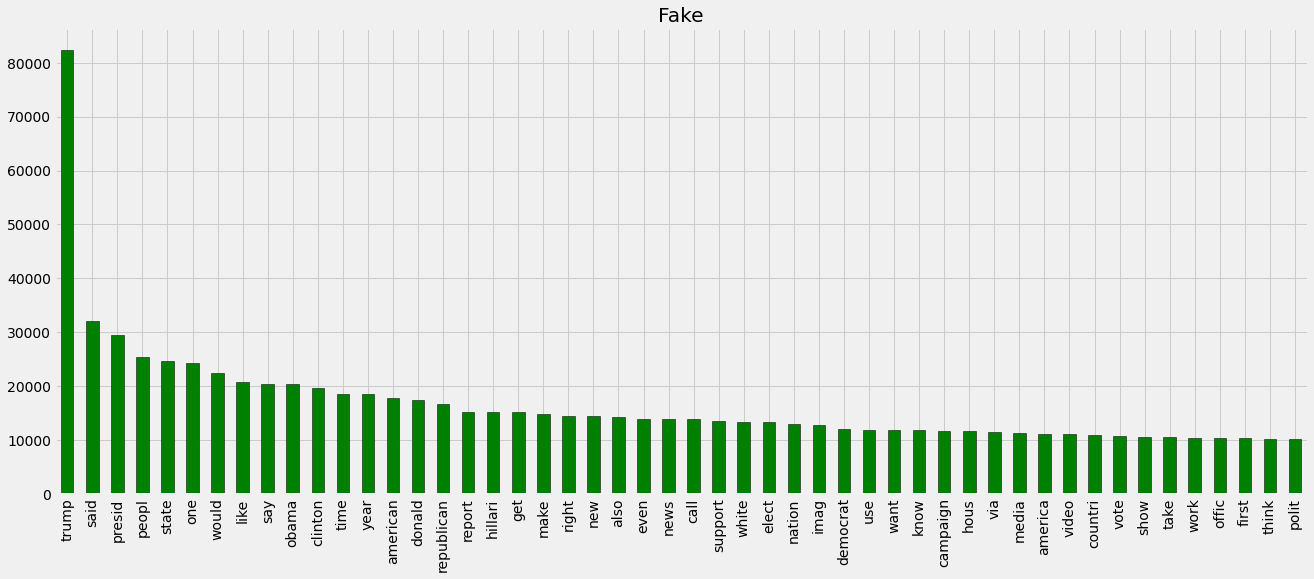

In [31]:
data_3=df[df['target']==1]
pd.Series(' '.join([i for i in data_3.text_clean_stem]).split()).value_counts()[:50].plot(kind='bar', figsize=(20,8), color='yellow', edgecolor='black',title='Real')
plt.show() 

data_2=df[df['target']==0] 
pd.Series(' '.join([i for i in data_2.text_clean_stem]).split()).value_counts()[:50].plot(kind='bar', figsize=(20,8), color='green', edgecolor='black',title='Fake')

In [32]:
df.head()

,text,target,temp_list,clean_text,clean_temp,text_clean_stem,clean_temp_stem
0,WASHINGTON (Reuters) - Transgender students at...,1,"[WASHINGTON, (Reuters), -, Transgender, studen...",washington reuters transgender student public ...,"[washington, reuters, transgender, student, pu...",washington reuter transgend student public sch...,"[washington, reuter, transgend, student, publi..."
1,OUR GOOD FRIENDS AT TEXAS BORDER VOLUNTEERS ar...,0,"[OUR, GOOD, FRIENDS, AT, TEXAS, BORDER, VOLUNT...",good friend texas border volunteer border catc...,"[good, friend, texas, border, volunteer, borde...",good friend texa border volunt border catch il...,"[good, friend, texa, border, volunt, border, c..."
2,(Reuters) - Jeff Sessions may be known as a pr...,1,"[(Reuters), -, Jeff, Sessions, may, be, known,...",reuters jeff session may known pro business co...,"[reuters, jeff, session, may, known, pro, busi...",reuter jeff session may known pro busi conserv...,"[reuter, jeff, session, may, known, pro, busi,..."
3,President Trump just made liberal heads explod...,0,"[President, Trump, just, made, liberal, heads,...",president trump made liberal head explode libe...,"[president, trump, made, liberal, head, explod...",presid trump made liber head explod liber mant...,"[presid, trump, made, liber, head, explod, lib..."
4,Before running the most controversial and bomb...,0,"[Before, running, the, most, controversial, an...",running controversial bombastic political camp...,"[running, controversial, bombastic, political,...",run controversi bombast polit campaign recent ...,"[run, controversi, bombast, polit, campaign, r..."


In [33]:
import plotly.express as pe
import plotly.figure_factory as ff
fig = pe.bar(temp_3, x="frequency", y = "common_words", title="Common Words", orientation='h', width=700, height=700, color='common_words')
fig.show()

Top first 50 words in true news

In [34]:
df_t = df# true news
df_t['clean_temp_stem']=df_t[df_t['target']==1]['text_clean_stem']
df_t['clean_temp_stem']=df_t['clean_temp_stem'].apply(lambda x: str(x).split()) 
top=Counter([word for li in df_t['clean_temp_stem'] for word in li]) 
temp_5=pd.DataFrame(top.most_common(50)) 
temp_5.columns=["common_words",'frequency'] 
temp_5.style.background_gradient(cmap='Greens')

,common_words,frequency
0,said,99076
1,trump,60329
2,state,38752
3,would,31839
4,presid,30783
5,reuter,29110
6,republican,23987
7,nan,23492
8,year,22873
9,govern,21220


Top first 50 words in fake news

In [35]:
df_f = df# fake news
df_f['clean_temp_stem']=df_f[df_f['target']==0]['text_clean_stem']
df_f['clean_temp_stem']=df_f['clean_temp_stem'].apply(lambda x: str(x).split()) 
top=Counter([word for li in df_f['clean_temp_stem'] for word in li]) 
temp_6=pd.DataFrame(top.most_common(50)) 
temp_6.columns=["common_words",'frequency'] 
temp_6.style.background_gradient(cmap='Reds')

,common_words,frequency
0,trump,82337
1,said,32098
2,presid,29583
3,peopl,25433
4,state,24729
5,one,24393
6,would,22470
7,nan,21435
8,like,20898
9,say,20407


# Practice 3

# Vectorization methods

1. CountVectorizer

This is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into word frequency vector that shows how often a word occurs throughout the text. The CountVecorizer creates a matrix where each unique word is represented by a matrix column, and each text instance from the document is represented by a row in the matrix. The value of each cell is nothing but the number of the word in that particular text sample.
CountVecorizer is the simplest technique involves three operations:

● Tokenization

First, the input text is tokenized. A sentence is presented as a list of its constituent words, and it’s done for all the input sentences.

● Vocabulary creation

From all obtained tokenized words, only unique words are selected to create the vocabulary and then sorted by alphabetical order.

● Vector representation

Finally, the sparse matrix is filled with vocabulary word frequencies. In this sparse matrix, each row is a sentence vector whose length (the columns of the matrix) is equal to the size of the dictionary. Let's work with an example and see what it looks like in practice.

Task 1: give the definition to text vectorization (word embedding).

Therefore, vectorization or word embedding is the process of converting text data into numeric vectors.

https://runebook.dev/ru/docs/scikit_learn/modules/feature_extraction
documentation countvectorizer


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
# max_features: The CountVectorizer will select the
# words/features/terms which occur the most frequently.
# It takes absolute values so if you set the ‘max_features = 3’,
# it will select the 3 most common words in the data.
countv = CountVectorizer(max_features = 1000)
X = countv.fit_transform(df.clean_text).toarray()
y = df.iloc[:, 1].values

In [38]:
print(X.shape)
print()
print("To array: \n", X)

(44898, 1000)

To array: 
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 3]
 [0 0 0 ... 0 0 0]]


In [39]:
print(y)

[1 0 1 ... 0 0 1]


In [40]:
#Split data for further usage in the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.20, random_state = 123)

Task 2: print out the dictionary that you get with CountVectorizer, describe the output.

Task 3: print out and describe the structure of “X_train” and “Y_train” objects.

Task 4: what does the “random_state” parameter influence on? can it be initialized with
another value?

Random_state controls the shuffling applied to the data before applying the split.At zero, the output values will always be the same.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
X = df.clean_text 
y = df.iloc[:, 1].values
print("X:\n",X,"\ny:\n",y)

X:
 0        washington reuters transgender student public ...
1        good friend texas border volunteer border catc...
2        reuters jeff session may known pro business co...
3        president trump made liberal head explode libe...
4        running controversial bombastic political camp...
                               ...                        
44893    washington new york reuters mass shooting orla...
44894    seoul reuters south korea welcomed tuesday new...
44895    donald trump presidential campaign spiraling c...
44896    last week president trump stepped interceded b...
44897    brussels reuters european union leader agree f...
Name: clean_text, Length: 44898, dtype: object 
y:
 [1 0 1 ... 0 0 1]


Task5: Describe the code above and the output results.

we have extracted all the values of the clean text column from the df data frame

Output a list with all values from column 1 ('target')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [44]:
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7) 

# fit the vectorizer and transform X_train into a tf-idf matrix, 
# then use the same vectorizer to transform X_test 

tfidf_train = my_tfidf.fit_transform(X_train) 
tfidf_test = my_tfidf.transform(X_test) 

tfidf_train

<35918x87794 sparse matrix of type '<class 'numpy.float64'>'
	with 4972292 stored elements in Compressed Sparse Row format>

Task 6: get TF-IDF score for each line of dataframe and put the result into column “TF-IDF score”. 

Task 7: describe in your words considered vectorization methods CountVectorizer and TF-IDF.

In [45]:
#settings that you use for count vectorizer will go her
TfIdfVectorizer = TfidfVectorizer(use_idf=True)

#Learn vocabulary and idf, return document-term matrix.
tfidfVector = TfIdfVectorizer.fit_transform(df.clean_text)

#place Tf-Idf values in dataframe
tf_idf_df = pd.DataFrame(tfidfVector[0].T.todense(), index=TfIdfVectorizer.get_feature_names_out(), columns=['TF-IDF Score'])
tf_idf_df = tf_idf_df.sort_values('TF-IDF Score', ascending=False)
print(tf_idf_df.head(30))

                TF-IDF Score
transgender         0.473176
court               0.337450
student             0.331143
bathroom            0.295006
school              0.212569
grimm               0.204380
justice             0.138074
supreme             0.137733
title               0.097634
high                0.092004
gender              0.091906
ruling              0.090767
perkins             0.087675
limbo               0.082387
legal               0.081505
protects            0.073534
gorsuch             0.072880
conservative        0.072685
action              0.071308
use                 0.071212
case                0.069133
access              0.068844
brought             0.068646
whether             0.068315
privacy             0.065252
public              0.064106
administration      0.063960
advocacy            0.063388
circuit             0.062430
pending             0.061907


The countvectorizer counts the number of used words in a document without any word selection. The tfidfvectorizer assigns higher weights to less common words and lower weights to more frequent words, thus excluding stop words. The words "a, the, an, it..." are not informative.

# Practice 4
# Word2Vec: Skip-Gram vs CBOW

**Task 1: Describe how to create the word2vec embeddings on the base of a skip-gram.**

Word2vec takes a large corpus of text as input and creates a vector space (feature space), typically consisting of several hundred dimensions, with each unique word in the corpus assigned a corresponding vector in the space. This is done by creating pairs of context and target word, which additionally depends on the so-called window size. The skip-gram model learns by predicting the surrounding words given the current word.

**Task 2 :Describe how to create the Word2Vec embeddings on the base of CBOW.**

The CBOW model learns embedding by predicting the current word based on its context

In [25]:
import gensim

In [26]:
from gensim import corpora 
# How to create a dictionary from a list of sentences? 
documents = ['data science is one of the most important fields of science', 'this is one of the best data science courses', 'data scientists analyze data'] 

# Tokenize(split) the sentences into words 
texts = [[text for text in doc.split()] for doc in documents] 

# Create dictionary 
dictionary = corpora.Dictionary(texts) 
# Get information about the dictionary 
print(dictionary)

Dictionary(14 unique tokens: ['data', 'fields', 'important', 'is', 'most']...)


In [27]:
# Show the word to id map 
print(dictionary.token2id)

{'data': 0, 'fields': 1, 'important': 2, 'is': 3, 'most': 4, 'of': 5, 'one': 6, 'science': 7, 'the': 8, 'best': 9, 'courses': 10, 'this': 11, 'analyze': 12, 'scientists': 13}


In [28]:
from gensim.models import Word2Vec 

# train model
model = Word2Vec(texts, min_count=1) 
# summarize the loaded model 
print("\nmodel :\n", model) 
# summarize vocabulary 
words = list(model.wv.vocab) 
print("\nWords :\n", words) 
# access vector for one word 
print("\nmodel[scientists] :\n", model['scientists']) 
# save model 
model.save('model.bin') 
# load model 
new_model = Word2Vec.load('model.bin') 
print("\nnew_model : \n", new_model)


model :
 Word2Vec(vocab=14, size=100, alpha=0.025)

Words :
 ['data', 'science', 'is', 'one', 'of', 'the', 'most', 'important', 'fields', 'this', 'best', 'courses', 'scientists', 'analyze']

model[scientists] :
 [ 3.2910286e-03  3.6493849e-03  4.3425884e-04 -4.5935977e-03
 -2.4613709e-04 -2.4800305e-03  4.1012773e-03 -2.1315806e-03
  2.8189814e-03 -5.3207134e-04 -3.9684451e-03  4.2879660e-06
 -8.3194696e-04  3.5256313e-03 -1.3297686e-03  9.5855020e-04
  2.5201014e-03  4.3355529e-03  3.4759415e-04  1.8291593e-03
 -4.9215853e-03 -1.9047405e-03  4.2084674e-03  2.2143158e-03
  2.1695560e-03  4.9694306e-03 -4.0698336e-03  9.6949085e-04
 -4.5164488e-03 -1.9940163e-03  8.1988313e-04 -4.3079066e-03
  1.3592538e-03 -8.4581872e-05  1.5150938e-03 -4.6920050e-03
  4.1613383e-03  3.8033507e-03 -9.2742330e-04 -1.6971886e-03
  4.8887432e-03  2.9392596e-03  2.8603014e-03  1.2725733e-03
  3.5105692e-03  2.4159860e-03  3.8972257e-03  3.4541255e-03
 -1.7867314e-03 -4.9599662e-04  3.1848025e-04  4.541159

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



We can see several vectors for every word in our training data and it is definitely hard to understand. Visualizing can help us in this scenario:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



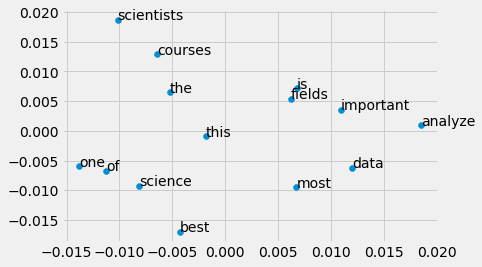

In [29]:
from gensim.models import Word2Vec 
from sklearn.decomposition import PCA 
from matplotlib import pyplot 

# fit a 2d PCA model to the vectors 
X = model[model.wv.vocab] 
pca = PCA(n_components=2) 
result = pca.fit_transform(X) 

# create a scatter plot of the projection 
pyplot.scatter(result[:, 0], result[:, 1]) 
words = list(model.wv.vocab) 

for i, word in enumerate(words): 
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1])) 

pyplot.show()

In [30]:
print(X)

[[-3.5839262e-03 -1.3922640e-03 -4.2387131e-03 ...  1.9069414e-03
   3.3349099e-03  2.1381874e-03]
 [-1.9628229e-03  1.5310954e-03  4.1343211e-03 ...  1.0120590e-03
  -3.9495821e-03  1.9463749e-03]
 [-8.9653325e-04 -1.7240156e-03 -4.7027734e-03 ... -3.2466617e-03
  -6.7047449e-04  1.8540800e-03]
 ...
 [-1.6787010e-03  3.9501619e-03 -6.9325068e-04 ...  4.6578860e-03
   7.7198674e-05 -3.7845911e-03]
 [ 3.2910286e-03  3.6493849e-03  4.3425884e-04 ... -2.7654336e-03
  -1.3888162e-03  7.3032739e-04]
 [-1.4550244e-03  4.3978845e-03 -4.4474471e-03 ...  3.0379358e-03
   2.9689420e-03 -2.3629707e-03]]


**Task 3: Analyze the line: X = model[model.wv.vocab].Shortly describe the PCA method. What is it used for?**

This string contains a list of lists of vectors of the identified bag of words.


PCA is a fundamentally a simple dimensionality reduction technique that transforms the columns of a dataset into a new set features called Principal Components (PCs). The information contained in a column is the amount of variance it contains. The primary objective of Principal Components is to represent the information in the dataset with minimum columns possible.

In [ ]:
from gensim.models import KeyedVectors

# load the google word2vec model 
filename = '/content/drive/MyDrive/Datasets/GoogleNews-vectors-negative300.bin' 
model = KeyedVectors.load_word2vec_format(filename, binary=True) 

# calculate: (king - man) + woman = ? 
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1) 
print(result)

**Task 5: Use Gensim library to define 10 most similar words to word “happy”**

In [ ]:
print(model.most_similar('happy'))

 **Task 6: Use Gensim library to train the model on first 3 texts of true-fake news. Visualize the results.
Task 7. Output top 5 most similar words to the most frequent word in texts.**

In [43]:
my_doc = df.clean_text[:3]

my_texts = [[text for text in docs.split()] for docs in my_doc]
my_dictionary = corpora.Dictionary(my_texts) 

print(my_dictionary)

Dictionary(404 unique tokens: ['accused', 'adam', 'ali', 'also', 'alt']...)


In [52]:
# create and train model
my_model = Word2Vec(my_texts, min_count=1) 
# summarize the loaded model 
print("\nmodel :\n", my_model) 
# summarize vocabulary 
words = list(my_model.wv.vocab) 
print("\nWords :\n", words) 
# access vector for one word 
print("\nmodel[twitter] :\n", my_model['twitter']) 
# save model 
my_model.save('my_model.bin') 



model :
 Word2Vec(vocab=404, size=100, alpha=0.025)

Words :
 ['liberal', 'twitter', 'accused', 'president', 'donald', 'trump', 'son', 'eric', 'sporting', 'nazi', 'haircut', 'debuted', 'new', 'hairdo', 'sunday', 'sported', 'hairstyle', 'side', 'head', 'shaved', 'interview', 'fox', 'news', 'trendy', 'style', 'far', 'unusual', 'celebrity', 'like', 'macklemore', 'david', 'beckham', 'brad', 'pitt', 'adam', 'levine', 'look', 'recent', 'year', 'member', 'alt', 'right', 'including', 'white', 'supremacist', 'richard', 'spencer', 'also', 'started', 'wearing', 'hair', 'way', 'even', 'begun', 'call', 'fashy', 'short', 'fascist', 'screenshot', 'first', 'hit', 'internet', 'reporter', 'assumed', 'worst', 'wfberic', 'possibly', 'unintentional', 'pic', 'com', 'mqubwenqq', 'ali', 'gharib', 'june', 'political', 'guardian', 'asks', 'word', 'wait', 'ben', 'jacob', 'bencjacobs', 'user', 'suggesting', 'special', 'chris', 'bigtrix', 'profile', 'say', 'mental', 'health', 'counselor', 'someone', 'could', 'use

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



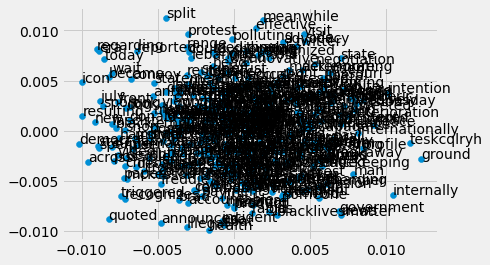

In [65]:
# fit a 2d PCA model to the vectors 
X = my_model[my_model.wv.vocab] 
pca = PCA(n_components=2) 
result = pca.fit_transform(X) 

# create a scatter plot of the projection 
pyplot.scatter(result[:, 0], result[:, 1]) 
words = list(my_model.wv.vocab) 

for i, word in enumerate(words): 
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1])) 

pyplot.show()

In [74]:
# Output top 5 most similar words to the most frequent word in texts.

df['example'] = my_doc
df['example'] = df['example'].apply(lambda x: str(x).split()) 
top=Counter([word for li in df['example'] for word in li]) 
temp_my_word=pd.DataFrame(top.most_common(5)) 
temp_my_word.columns=["common_words",'frequency'] 

print(temp_my_word)

print('\nTop 5 most similar words to cypriot :\n', my_model.wv.most_similar('cypriot', topn=5))

  common_words  frequency
0          nan      44895
1      cypriot         13
2        trump          9
3      twitter          8
4      turkish          8

Top 5 most similar words to cypriot :
 [('solves', 0.27441567182540894), ('carried', 0.2667630612850189), ('mental', 0.26135796308517456), ('trying', 0.24887287616729736), ('passion', 0.2353929877281189)]


1. In TF-IDF, we saw that every word was treated as an individual entity, and semantics were completely ignored. With the introduction of Word2Vec, the vector representation of words was said to be contextually aware, probably for the first time ever.

  Since every word is represented as an n-dimensional vector, one can imagine that all of the words are mapped to this n-dimensional space in such a manner that words having similar meanings exist in close proximity to one another in this hyperspace.

2. One-Hot Encoding is a process by which categorical variables are converted into a form suitable for Machine Learning (ML) algorithms.
Assigns position 1 to the selected target word, and 0 to all other words in the array

3. We take the context word fast encoding vector and feed it to the neural network. These inputs are multiplied by the Weights of the hidden layers and we end up with an output vector of 10,000 components.

  A softmax function (Softmax) is applied to the output layer, which converts the output vector of the neural network into a probability vector, with each component representing the probability of a word appearing in the vicinity of the target.

4. The first level is the input layer: a 2 × win(window) vector of words containing context in context (w). That is, according to the target word w, a word vector of winning words in its context is chosen as input.
The second level is the projection level: the 2× payoff vectors of the input layer are accumulated and summed.
The third level is the output level: according to the binary tree, there are N leaf nodes corresponding to each word in the dictionary. We use a Huffman tree to find the conditional probability of a word